In [ ]:
# https://drive.google.com/drive/folders/1TDAeYT30IDKgULs0UBxsv3YLaDnawOkg?usp=sharing

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow as tf

In [9]:
df = pd.read_csv('./datafiles/adult.txt', header=None, names = ['age', 'workclass','fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race'\
, 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', '50k'])
df.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  50k             32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# deep learning model을 생성, 학습 후 평가
# machine learning 모델과 비교

In [29]:
y = df.iloc[:,14]
x = df.iloc[:,:14]

In [48]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
e = LabelEncoder()
y_en = e.fit_transform(y)
y_en

array([0, 0, 0, ..., 0, 0, 1])

In [36]:
x = pd.get_dummies(x)

In [39]:
x.shape

(32561, 108)

In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y_en, random_state=111)

In [50]:
model = Sequential()
# input layer에서 차원을 맞춘다.
model.add(Dense(200, input_dim=108, activation='relu'))   # Dense : fully connected layer
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='relu'))

# sigmoid : 2분 클래스를 분류할 때 사용
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 200)               21800     
                                                                 
 dense_17 (Dense)            (None, 100)               20100     
                                                                 
 dense_18 (Dense)            (None, 50)                5050      
                                                                 
 dense_19 (Dense)            (None, 25)                1275      
                                                                 
 dense_20 (Dense)            (None, 12)                312       
                                                                 
 dense_21 (Dense)            (None, 6)                 78        
                                                                 
 dense_22 (Dense)            (None, 3)                

In [51]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [64]:
model.fit(x_train,y_train, epochs=100, batch_size=20)

Epoch 1/100
1221/1221 [==============================] - 2s 1ms/step - loss: 285.7203 - accuracy: 0.7642
Epoch 2/100
1221/1221 [==============================] - 1s 1ms/step - loss: 0.6042 - accuracy: 0.7618
Epoch 3/100
1221/1221 [==============================] - 1s 1ms/step - loss: 0.5548 - accuracy: 0.7612
Epoch 4/100
1221/1221 [==============================] - 1s 1ms/step - loss: 0.5492 - accuracy: 0.7612
Epoch 5/100
1221/1221 [==============================] - 2s 1ms/step - loss: 0.5492 - accuracy: 0.7612
Epoch 6/100
1221/1221 [==============================] - 2s 1ms/step - loss: 0.5492 - accuracy: 0.7612
Epoch 7/100
1221/1221 [==============================] - 1s 1ms/step - loss: 0.5492 - accuracy: 0.7612
Epoch 8/100
1221/1221 [==============================] - 1s 1ms/step - loss: 0.5492 - accuracy: 0.7612
Epoch 9/100
1221/1221 [==============================] - 1s 1ms/step - loss: 0.5492 - accuracy: 0.7612
Epoch 10/100
1221/1221 [==============================] - 1s 1ms/step -

1221/1221 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy: 0.7593
Epoch 80/100
1221/1221 [==============================] - 1s 1ms/step - loss: 0.5521 - accuracy: 0.7593
Epoch 81/100
1221/1221 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy: 0.7593
Epoch 82/100
1221/1221 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy: 0.7593
Epoch 83/100
1221/1221 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy: 0.7593
Epoch 84/100
1221/1221 [==============================] - 1s 1ms/step - loss: 0.5520 - accuracy: 0.7593
Epoch 85/100
1221/1221 [==============================] - 1s 1ms/step - loss: 0.5521 - accuracy: 0.7593
Epoch 86/100
1221/1221 [==============================] - 2s 1ms/step - loss: 0.5520 - accuracy: 0.7593
Epoch 87/100
1221/1221 [==============================] - 1s 1ms/step - loss: 0.5521 - accuracy: 0.7593
Epoch 88/100
1221/1221 [==============================] - 1s 1ms/step - loss:

In [67]:
model.evaluate(x_test, y_test)

255/255 [==============================] - 0s 1ms/step - loss: 0.5523 - accuracy: 0.7590


[0.5523282885551453, 0.7589976787567139]

In [ ]:
# scaling

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [54]:
model = Sequential()
# input layer에서 차원을 맞춘다.
model.add(Dense(200, input_dim=108, activation='relu'))   # Dense : fully connected layer
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(3, activation='relu'))

# sigmoid : 2분 클래스를 분류할 때 사용
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
model.fit(x_train_scaled,y_train, epochs=100, batch_size=20)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 200)               21800     
                                                                 
 dense_25 (Dense)            (None, 100)               20100     
                                                                 
 dense_26 (Dense)            (None, 50)                5050      
                                                                 
 dense_27 (Dense)            (None, 25)                1275      
                                                                 
 dense_28 (Dense)            (None, 12)                312       
                                                                 
 dense_29 (Dense)            (None, 6)                 78        
                                                                 
 dense_30 (Dense)            (None, 3)                

1221/1221 [==============================] - 1s 890us/step - loss: 0.1305 - accuracy: 0.9398
Epoch 65/100
1221/1221 [==============================] - 1s 863us/step - loss: 0.1257 - accuracy: 0.9416
Epoch 66/100
1221/1221 [==============================] - 1s 886us/step - loss: 0.1240 - accuracy: 0.9429
Epoch 67/100
1221/1221 [==============================] - 1s 887us/step - loss: 0.1259 - accuracy: 0.9410
Epoch 68/100
1221/1221 [==============================] - 1s 903us/step - loss: 0.1239 - accuracy: 0.9437
Epoch 69/100
1221/1221 [==============================] - 1s 902us/step - loss: 0.1219 - accuracy: 0.9433
Epoch 70/100
1221/1221 [==============================] - 1s 872us/step - loss: 0.1204 - accuracy: 0.9446
Epoch 71/100
1221/1221 [==============================] - 1s 911us/step - loss: 0.1203 - accuracy: 0.9439
Epoch 72/100
1221/1221 [==============================] - 1s 910us/step - loss: 0.1185 - accuracy: 0.9447
Epoch 73/100
1221/1221 [==============================] - 1

In [56]:
model.evaluate(x_test_scaled, y_test)

255/255 [==============================] - 0s 734us/step - loss: 1.2475 - accuracy: 0.8247


[1.2474936246871948, 0.8247144222259521]

In [57]:
from sklearn.linear_model import LogisticRegression

In [61]:
log = LogisticRegression()
log.fit(x_train_scaled, y_train)
preds = log.predict(x_test_scaled)
log.score(x_test_scaled, y_test)

0.8513696106129468

In [62]:
# 강사님 ver

In [65]:
y = df['50k'].apply(lambda x: 1 if x == ' >50K' else 0)
x = df.loc[:,:'native-country']

In [69]:
x.shape

(32561, 14)

In [70]:
x = pd.get_dummies(x)

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=111)

In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [85]:
x_train_scaled.shape

(22792, 108)

In [89]:
model = Sequential()
model.add(Dense(1024, activation = 'relu', input_dim = 108))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 64)                6976      
                                                                 
 dense_44 (Dense)            (None, 32)                2080      
                                                                 
 dense_45 (Dense)            (None, 16)                528       
                                                                 
 dense_46 (Dense)            (None, 1)                 17        
                                                                 
Total params: 9,601
Trainable params: 9,601
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [91]:
hist = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=20)

Epoch 1/50
912/912 [==============================] - 1s 1ms/step - loss: 0.3608 - accuracy: 0.8288 - val_loss: 0.3167 - val_accuracy: 0.8495
Epoch 2/50
912/912 [==============================] - 1s 944us/step - loss: 0.3190 - accuracy: 0.8492 - val_loss: 0.3113 - val_accuracy: 0.8568
Epoch 3/50
912/912 [==============================] - 1s 948us/step - loss: 0.3076 - accuracy: 0.8540 - val_loss: 0.3082 - val_accuracy: 0.8533
Epoch 4/50
912/912 [==============================] - 1s 937us/step - loss: 0.3010 - accuracy: 0.8570 - val_loss: 0.3067 - val_accuracy: 0.8533
Epoch 5/50
912/912 [==============================] - 1s 910us/step - loss: 0.2952 - accuracy: 0.8621 - val_loss: 0.3055 - val_accuracy: 0.8548
Epoch 6/50
912/912 [==============================] - 1s 916us/step - loss: 0.2891 - accuracy: 0.8639 - val_loss: 0.3107 - val_accuracy: 0.8519
Epoch 7/50
912/912 [==============================] - 1s 906us/step - loss: 0.2837 - accuracy: 0.8663 - val_loss: 0.3080 - val_accuracy: 0

In [ ]:
# binary로는 전혀 학습이 되지 않는다.

In [ ]:
# multi classification ver

In [103]:
# one-hot 형식으로 바꿔주기
y_oh = tf.keras.utils.to_categorical(y)
y_oh

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y_oh, test_size=0.3, random_state=111)

In [129]:
model = Sequential()
model.add(Dense(256, activation = 'relu', input_dim = 108))
# Dropout : 과적합을 해소해준다, 0.7(70%)에 해당하는 노드들만 남겨두고 다 지워버리는 것을 의미한다.
model.add(Dropout(0.3))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation = 'softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adagrad')

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 256)               27904     
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_77 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_78 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_79 (Dense)            (None, 32)              

In [130]:
hist = model.fit(x_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=20)

Epoch 1/50
912/912 [==============================] - 2s 1ms/step - loss: 0.5901 - accuracy: 0.7207 - val_loss: 0.4742 - val_accuracy: 0.7730
Epoch 2/50
912/912 [==============================] - 1s 1ms/step - loss: 0.5182 - accuracy: 0.7585 - val_loss: 0.4240 - val_accuracy: 0.8074
Epoch 3/50
912/912 [==============================] - 1s 1ms/step - loss: 0.4830 - accuracy: 0.7718 - val_loss: 0.3946 - val_accuracy: 0.8285
Epoch 4/50
912/912 [==============================] - 1s 1ms/step - loss: 0.4530 - accuracy: 0.7835 - val_loss: 0.3768 - val_accuracy: 0.8370
Epoch 5/50
912/912 [==============================] - 1s 1ms/step - loss: 0.4343 - accuracy: 0.7944 - val_loss: 0.3663 - val_accuracy: 0.8419
Epoch 6/50
912/912 [==============================] - 1s 1ms/step - loss: 0.4256 - accuracy: 0.7995 - val_loss: 0.3596 - val_accuracy: 0.8421
Epoch 7/50
912/912 [==============================] - 1s 1ms/step - loss: 0.4197 - accuracy: 0.8004 - val_loss: 0.3561 - val_accuracy: 0.8405
Epoch 

In [131]:
model.evaluate(x_test_scaled, y_test)

306/306 [==============================] - 0s 824us/step - loss: 0.3416 - accuracy: 0.8428


[0.3415783643722534, 0.8427679538726807]

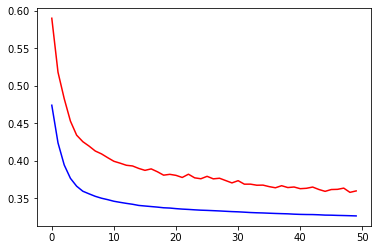

In [132]:
plt.plot(hist.history['loss'], c='r')
plt.plot(hist.history['val_loss'], c='b')

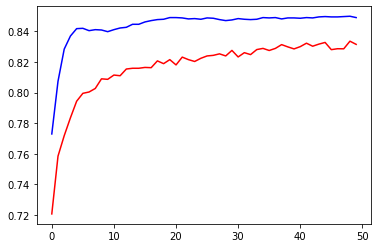

In [133]:
plt.plot(hist.history['accuracy'], c='r')
plt.plot(hist.history['val_accuracy'], c='b')

In [ ]:
# 머신러닝

In [134]:
from sklearn.ensemble import RandomForestClassifier

In [135]:
rfc = RandomForestClassifier()
rfc.fit(x_train_scaled, y_train)
rfc.score(x_test_scaled, y_test)

0.8505476507319071